<a href="https://colab.research.google.com/github/bdfd/1.2_House_Model_Exploration/blob/main/House_Model_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Model Prediction Data Exploratory Analysis 

In [1]:
!pip install table-nan-val

In [2]:
# data analysis and wrangling
import numpy as np
import pandas as pd
# require addition install package refer to [1]
import table_nan_val as tnv
import random as rnd
import warnings

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# data analysis and wrangling
import numpy as np
import pandas as pd

In [4]:
path1 = 'https://raw.githubusercontent.com/bdfd/1.2_House_Model_Exploration/main/Data/house_price.csv'
# upload house price dataset into data frame
df = pd.read_csv(path1)
df.head(3)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500

[3 rows x 81 columns]

In [5]:
import table_nan_val as tnv

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


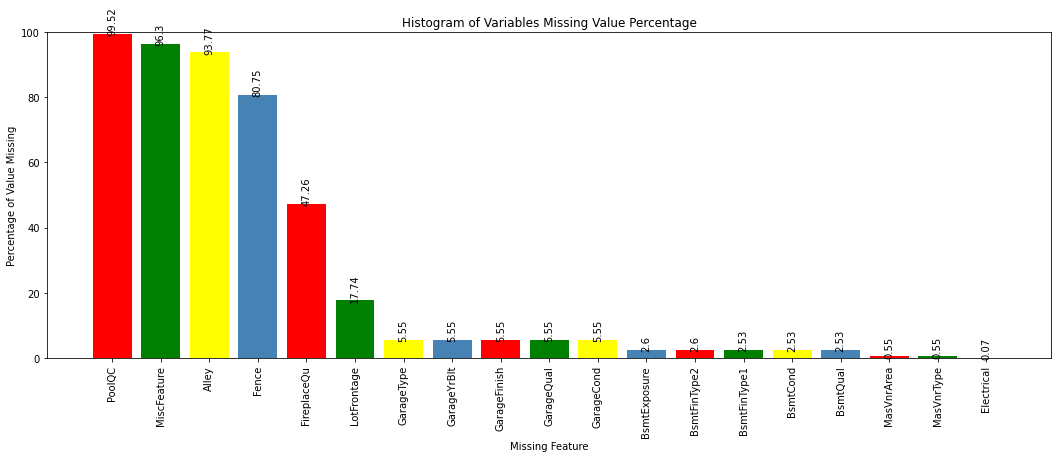

index  Miss_Values  Miss_Rate  Available_Value
16        PoolQC         1453      99.52                7
18   MiscFeature         1406      96.30               54
1          Alley         1369      93.77               91
17         Fence         1179      80.75              281
10   FireplaceQu          690      47.26              770
0    LotFrontage          259      17.74             1201
11    GarageType           81       5.55             1379
12   GarageYrBlt           81       5.55             1379
13  GarageFinish           81       5.55             1379
14    GarageQual           81       5.55             1379
15    GarageCond           81       5.55             1379
6   BsmtExposure           38       2.60             1422
8   BsmtFinType2           38       2.60             1422
7   BsmtFinType1           37       2.53             1423
5       BsmtCond           37       2.53             1423
4       BsmtQual           37       2.53             1423
3     MasVnrArea            8       0.55             1452
2     MasVnrType            8       0.55             1452
9     Electrical            1       0.07             1459

In [6]:
tnv.Missing_Value_Analysis(df)

In [7]:
df = df.dropna(axis='columns',thresh=800)

In [8]:
df.shape
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 76 columns]

In [9]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
df.describe(include=['number']).shape
df.describe(include=['number'])
print(df.describe(include=['number']).shape,'\n',df.describe(include=['number']).to_string())

(8, 38) 
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  14

In [11]:
df2= df.describe(include=['number'])
df3 = df2.reset_index()
df3

index           Id   MSSubClass  ...       MoSold       YrSold      SalePrice
0  count  1460.000000  1460.000000  ...  1460.000000  1460.000000    1460.000000
1   mean   730.500000    56.897260  ...     6.321918  2007.815753  180921.195890
2    std   421.610009    42.300571  ...     2.703626     1.328095   79442.502883
3    min     1.000000    20.000000  ...     1.000000  2006.000000   34900.000000
4    25%   365.750000    20.000000  ...     5.000000  2007.000000  129975.000000
5    50%   730.500000    50.000000  ...     6.000000  2008.000000  163000.000000
6    75%  1095.250000    70.000000  ...     8.000000  2009.000000  214000.000000
7    max  1460.000000   190.000000  ...    12.000000  2010.000000  755000.000000

[8 rows x 39 columns]

In [12]:
df.describe(include=['object']).shape
df.describe(include=['object'])
print(df.describe(include=['object']).shape,'\n',df.describe(include=['object']).to_string())

(4, 38) 
        MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
count      1460   1460     1460        1460      1460      1460      1460         1460       1460       1460     1460       1460      1460     1460        1460        1460       1452      1460      1460       1460     1423     1423         1422         1423         1422    1460      1460       1460       1459        1460       1460       1379         1379       1379       1379       1460     1460          1460
unique        5      2        4           4         2         5         3           25          9          8        5          8         6        8          15   

In [13]:
df.describe(include='all')

Id   MSSubClass MSZoning  ...  SaleType  SaleCondition      SalePrice
count   1460.000000  1460.000000     1460  ...      1460           1460    1460.000000
unique          NaN          NaN        5  ...         9              6            NaN
top             NaN          NaN       RL  ...        WD         Normal            NaN
freq            NaN          NaN     1151  ...      1267           1198            NaN
mean     730.500000    56.897260      NaN  ...       NaN            NaN  180921.195890
std      421.610009    42.300571      NaN  ...       NaN            NaN   79442.502883
min        1.000000    20.000000      NaN  ...       NaN            NaN   34900.000000
25%      365.750000    20.000000      NaN  ...       NaN            NaN  129975.000000
50%      730.500000    50.000000      NaN  ...       NaN            NaN  163000.000000
75%     1095.250000    70.000000      NaN  ...       NaN            NaN  214000.000000
max     1460.000000   190.000000      NaN  ...       NaN            NaN  755000.000000

[11 rows x 76 columns]

In [14]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [15]:
# missing_value_table(df).transpose()

In [16]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [17]:
# visualization
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


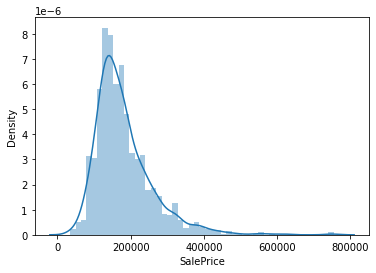

In [18]:
#Histogram-1:sale price distribution
Figure1 = sns.distplot(df['SalePrice']);

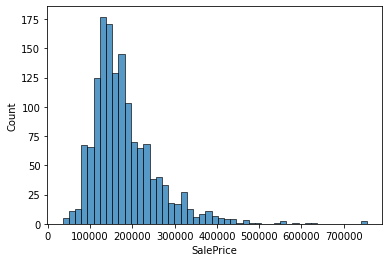

In [19]:
#Histogram-2:sale price distribution
Figure2 = sns.histplot(df['SalePrice']);

In [20]:
#skewness and kurtosis analysis from histogram
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


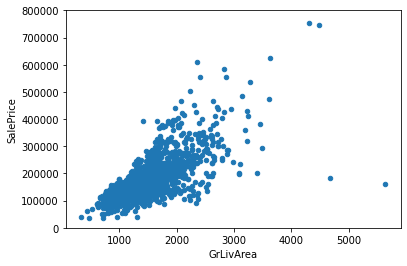

In [21]:
#ScatterPlot:Ground Living Area vs Saleprice
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

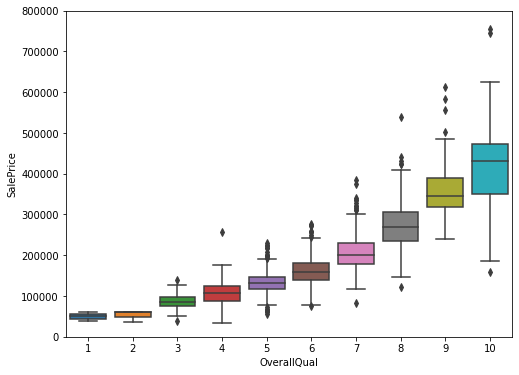

In [22]:
#BoxPlot: Overall Quality vs Saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
fig, axs = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

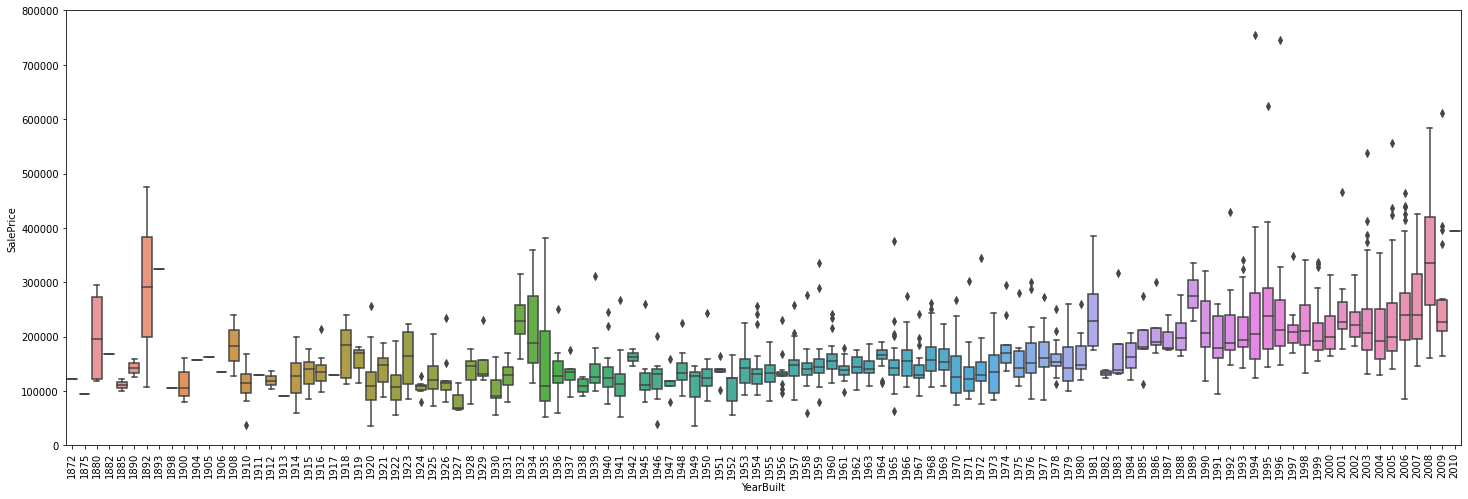

In [23]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

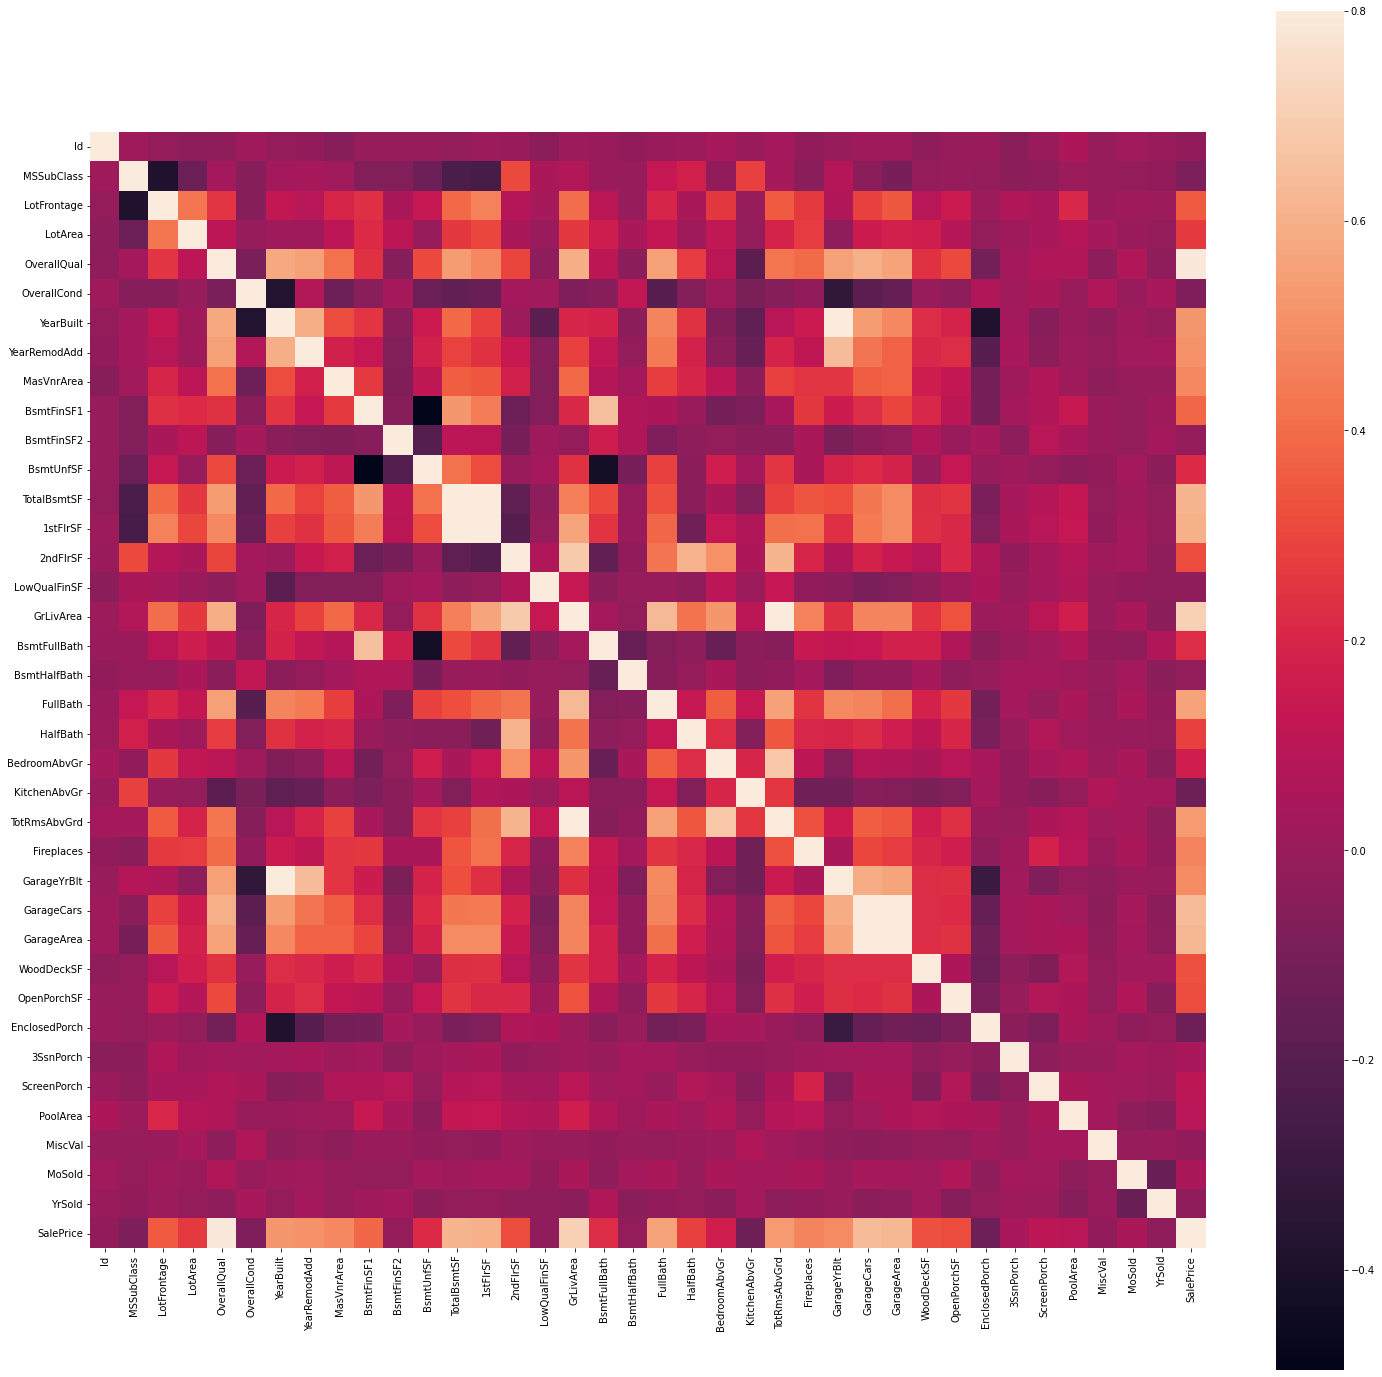

In [24]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, vmax=.8, square=True);

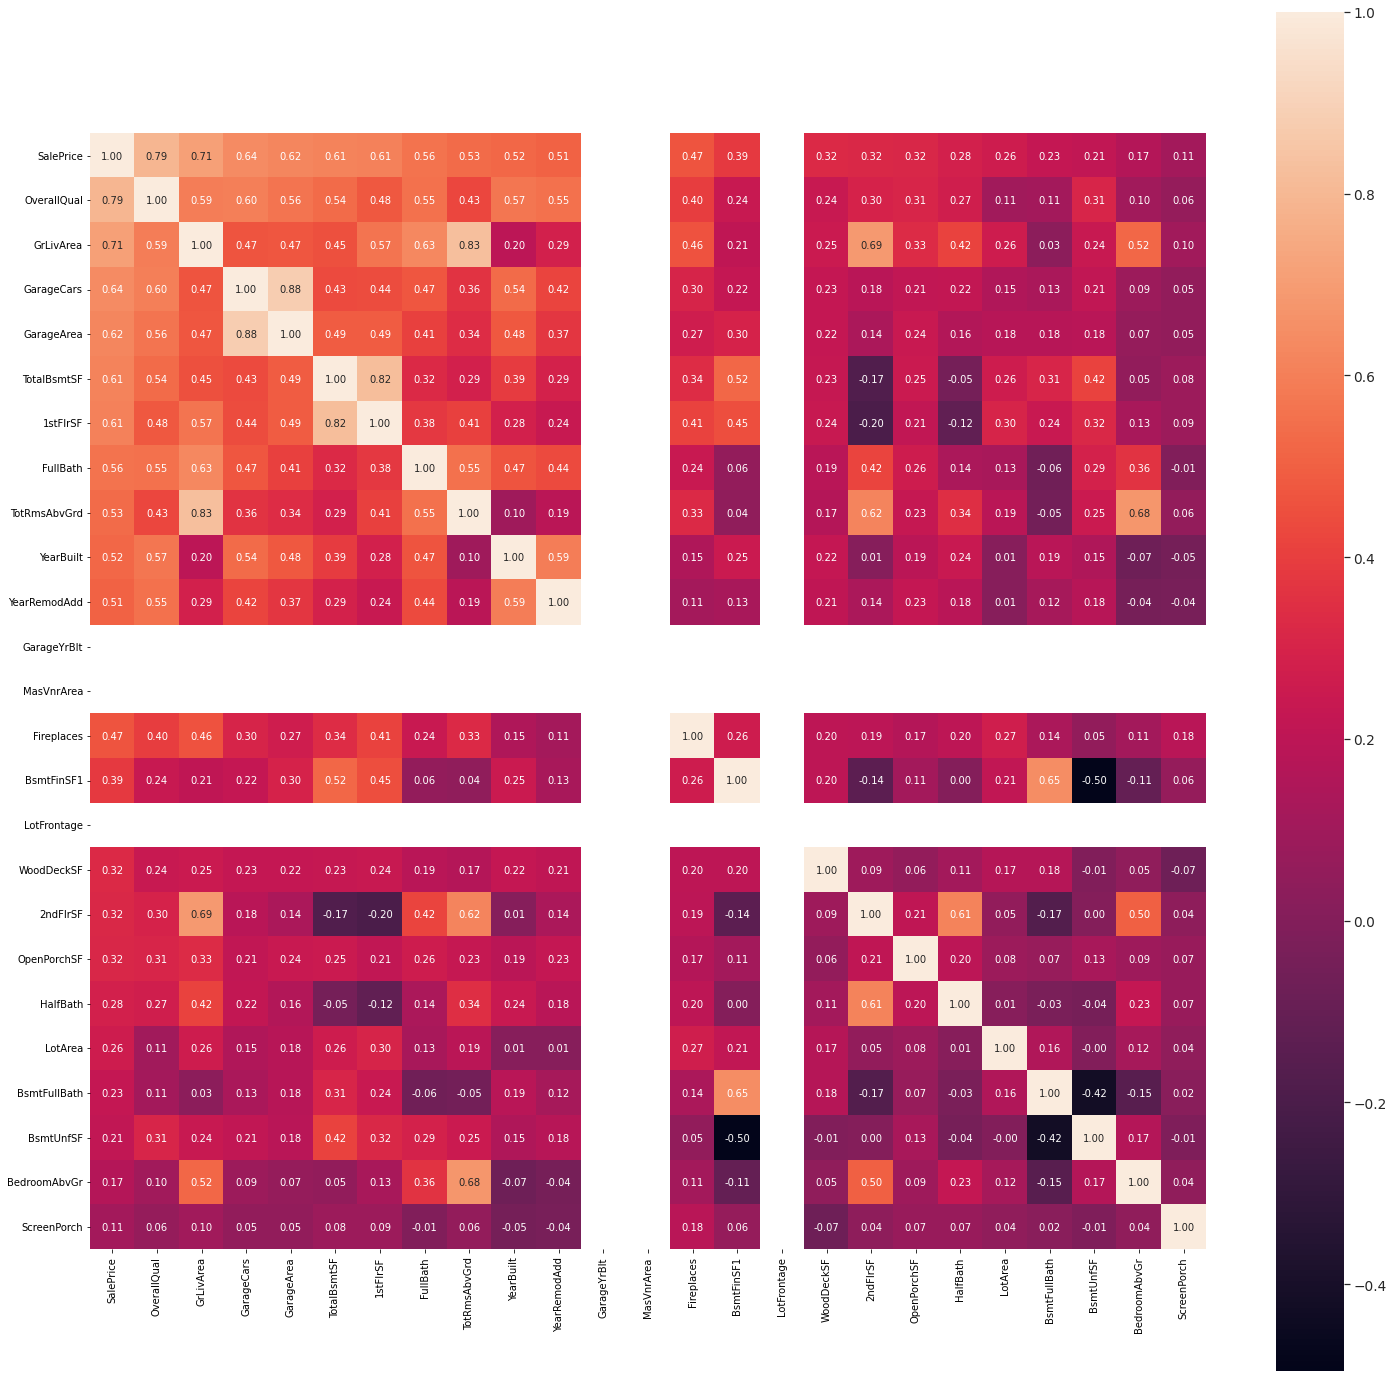

In [25]:
#saleprice correlation matrix
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(25, 25))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

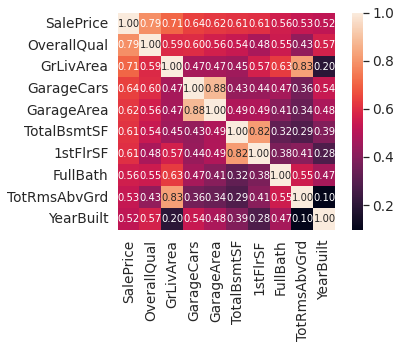

In [26]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

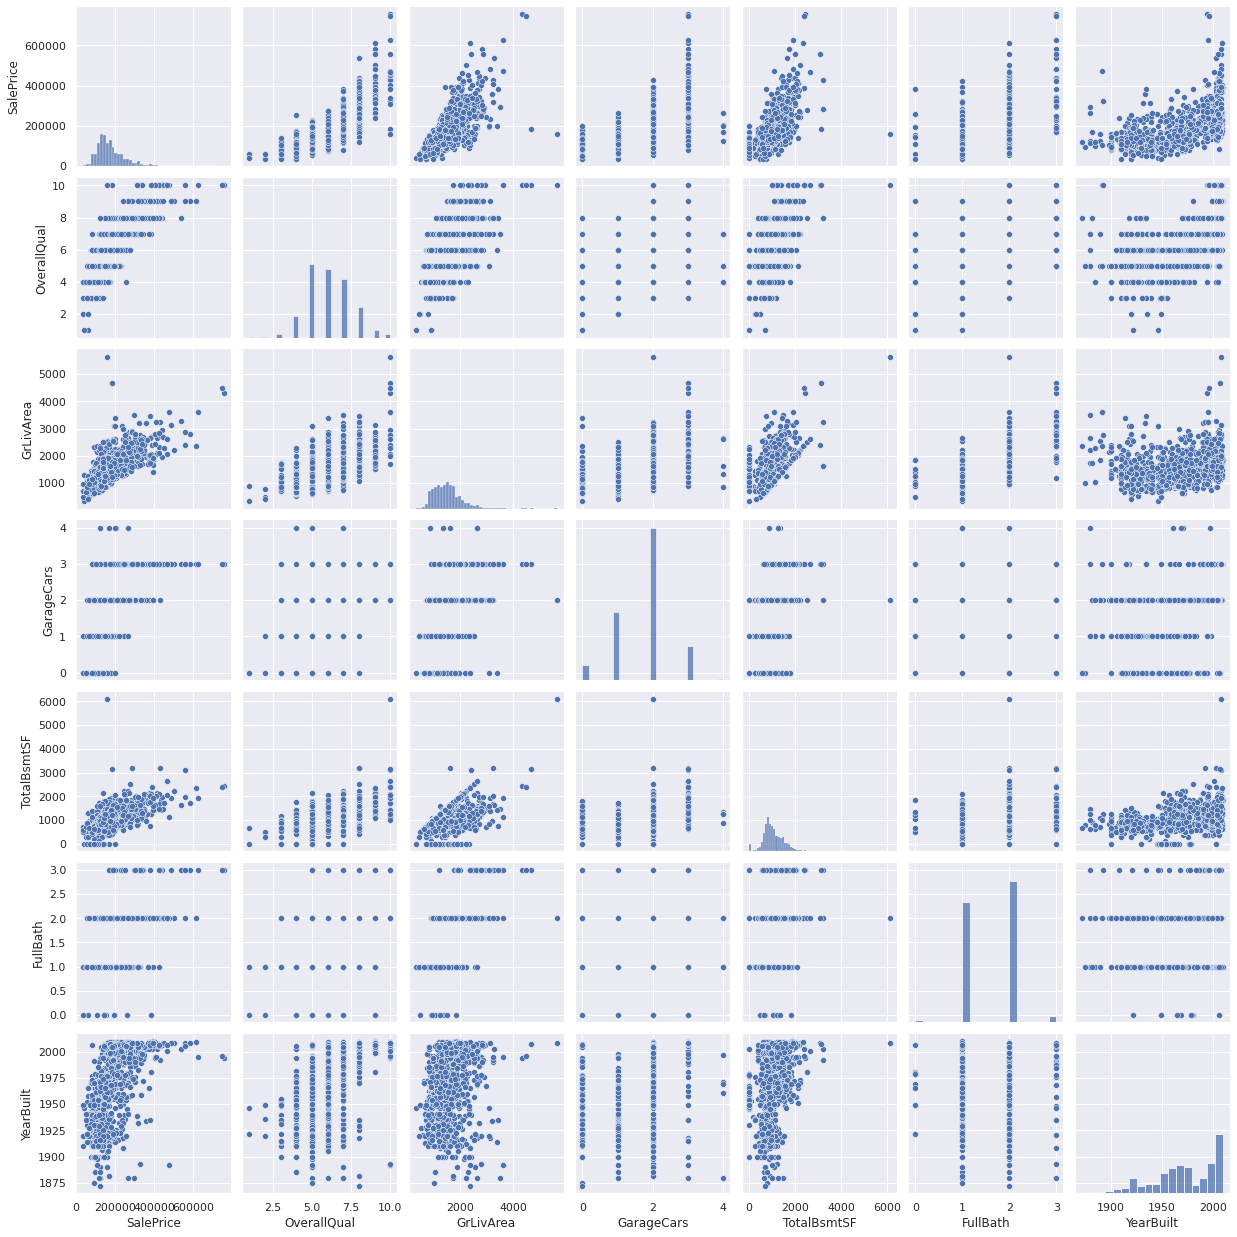

In [27]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height= 2.5)
plt.show();

In [28]:
#dealing with missing data
# df2 = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
# df2 = df.drop(df.loc[df['Electrical'].isnull()].index)
# df.isnull().sum().max() #just checking that there's no missing data missing...

In [29]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


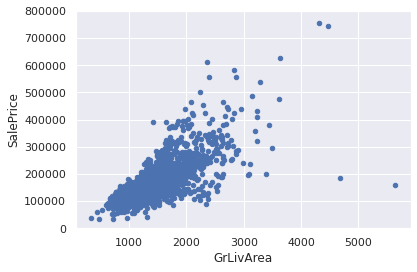

In [30]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [31]:
#deleting points
df.sort_values(by = 'GrLivArea', ascending = False)[:10]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


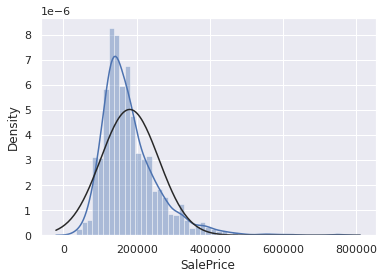

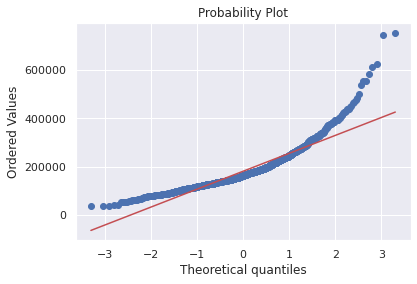

In [32]:
#histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [33]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


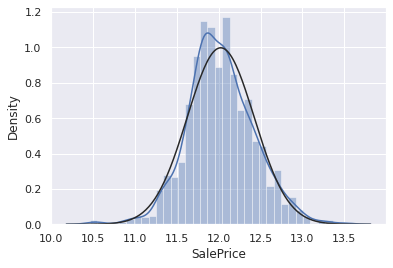

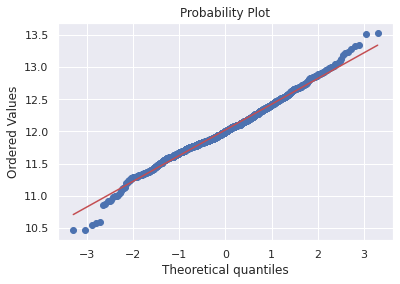

In [34]:
#transformed histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


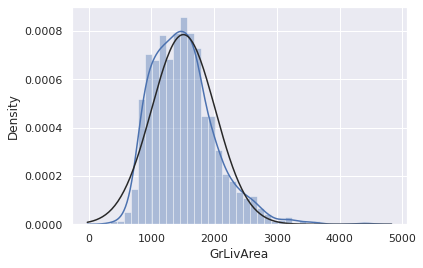

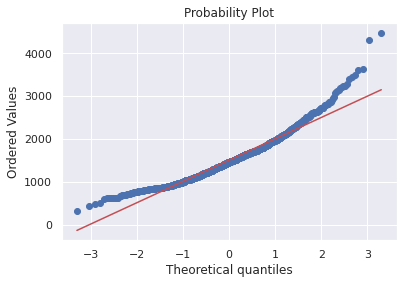

In [35]:
#histogram and normal probability plot
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

In [36]:
#data transformation
df['GrLivArea'] = np.log(df['GrLivArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


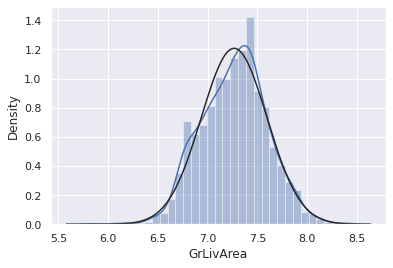

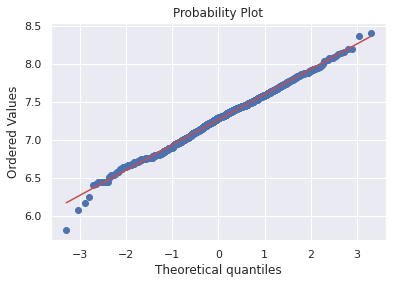

In [37]:
#transformed histogram and normal probability plot
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


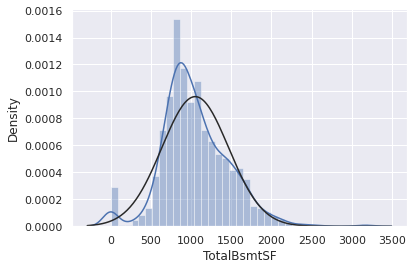

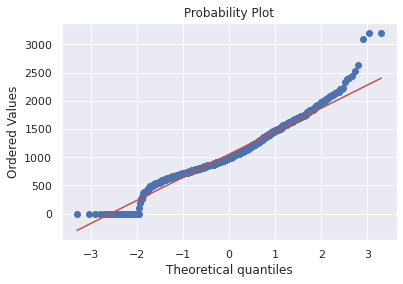

In [38]:
#histogram and normal probability plot
sns.distplot(df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

In [39]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [40]:
#transform data
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


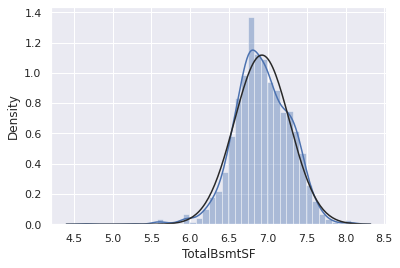

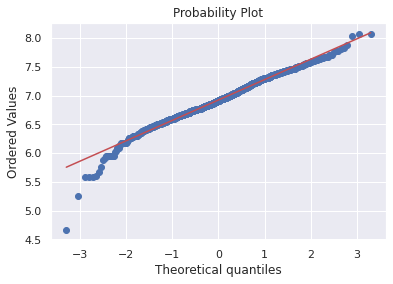

In [41]:
#histogram and normal probability plot
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

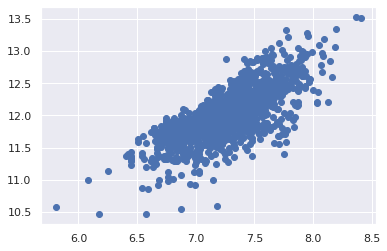

In [42]:
#scatter plot
plt.scatter(df['GrLivArea'], df['SalePrice']);

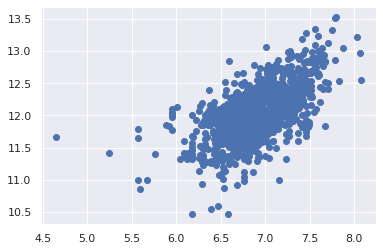

In [43]:
#scatter plot
plt.scatter(df[df['TotalBsmtSF']>0]['TotalBsmtSF'],df[df['TotalBsmtSF']>0]['SalePrice']);

In [44]:
#convert categorical variable into dummy
df = pd.get_dummies(df)

In [45]:
df

Id  MSSubClass  ...  SaleCondition_Normal  SaleCondition_Partial
0        1          60  ...                     1                      0
1        2          20  ...                     1                      0
2        3          60  ...                     1                      0
3        4          70  ...                     0                      0
4        5          60  ...                     1                      0
...    ...         ...  ...                   ...                    ...
1455  1456          60  ...                     1                      0
1456  1457          20  ...                     1                      0
1457  1458          70  ...                     1                      0
1458  1459          20  ...                     1                      0
1459  1460          20  ...                     1                      0

[1458 rows x 272 columns]